In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


C:\Users\ChissanuPC\AppData\Local\Temp\ipykernel_22180\101055811.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("anime-dataset-2023.csv", encoding="utf8")
data.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41,43,78525,914193,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1,1-Sep-01,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189,602,1448,206248,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328,246,15035,356739,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764,1795,613,42829,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240,5126,14,6413,15001,https://cdn.myanimelist.net/images/anime/7/215...


# Clean Data

In [3]:
data = data.dropna(subset=['Genres'])
data = data.dropna(subset=['Source'])
data = data.dropna(subset=['Studios'])
data = data.dropna(subset=['Score'])
data.isnull().sum()

data = data[data['Genres'] != 'UNKNOWN']
data = data[data['Source'] != 'UNKNOWN']
data = data[data['Studios'] != 'UNKNOWN']
data = data[data['Score'] != 'UNKNOWN']

In [4]:
data.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41,43,78525,914193,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1,1-Sep-01,...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189,602,1448,206248,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328,246,15035,356739,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764,1795,613,42829,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240,5126,14,6413,15001,https://cdn.myanimelist.net/images/anime/7/215...


In [5]:
scaler = MinMaxScaler()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df = data[['Score','Genres','Studios']].copy()

df_with_id = data[['anime_id','Name','Score','Genres','Studios']].copy()

df['Score'] = scaler.fit_transform(df[['Score']])
df['Genres'] = df['Genres'].str.split(', ')
df = df.explode('Genres')

df_with_id['Score'] = scaler.fit_transform(df_with_id[['Score']])
df_with_id['Genres'] = df_with_id['Genres'].str.split(', ')
df_with_id = df_with_id.explode('Genres')


df['Genres'] = le.fit_transform(df['Genres'])
df['Studios'] = le.fit_transform(df['Studios'])

df_with_id['Genres'] = le.fit_transform(df_with_id['Genres'])
df_with_id['Studios'] = le.fit_transform(df_with_id['Studios'])

# df = pd.get_dummies(df, columns=["genres", "studios"])

df['Score'].describe()



count    25587.000000
mean         0.672703
std          0.113606
min          0.000000
25%          0.597241
50%          0.674483
75%          0.750345
max          1.000000
Name: Score, dtype: float64

In [6]:
print(len(df))
print(len(df_with_id))

25587
25587


In [7]:
df.isnull().count()
# df.head()

Score      25587
Genres     25587
Studios    25587
dtype: int64

In [8]:
df

,Score,Genres,Studios
0,0.951724,0,1063
0,0.951724,3,1063
0,0.951724,16,1063
1,0.900690,0,158
1,0.900690,16,158
...,...,...,...
24579,0.550345,5,6
24579,0.550345,9,6
24590,0.571034,0,379
24590,0.571034,5,379


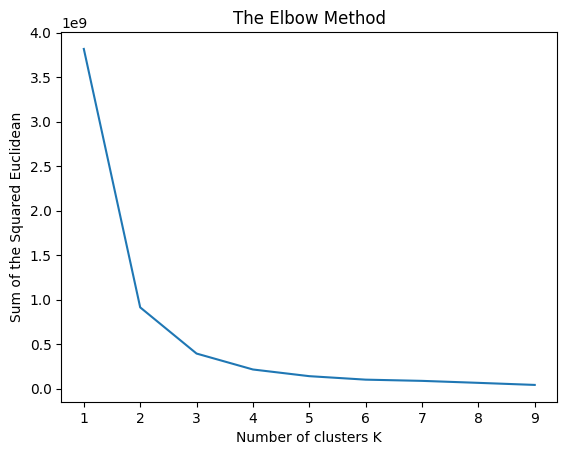

In [9]:
k_meansclus = range(1,10)
sse = []

for k in k_meansclus:
  km = KMeans(n_clusters =k)
  km.fit(df)
  sse.append(km.inertia_)

plt.title('The Elbow Method')
plt.plot(k_meansclus,sse)
plt.xlabel('Number of clusters K')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

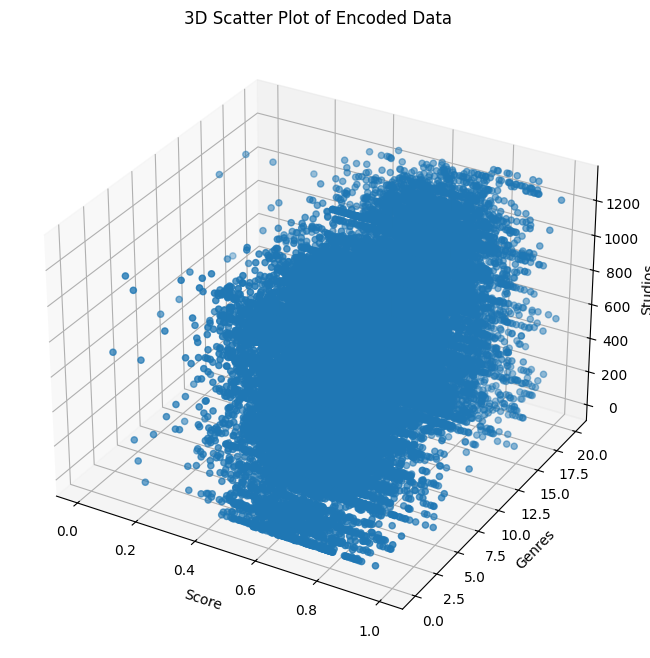

In [10]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each data point with a different color based on the encoded columns
ax.scatter(df['Score'], df['Genres'], df['Studios'])

# Set labels and title
ax.set_xlabel('Score')
ax.set_ylabel('Genres')
ax.set_zlabel('Studios')
ax.set_title('3D Scatter Plot of Encoded Data')

plt.show()

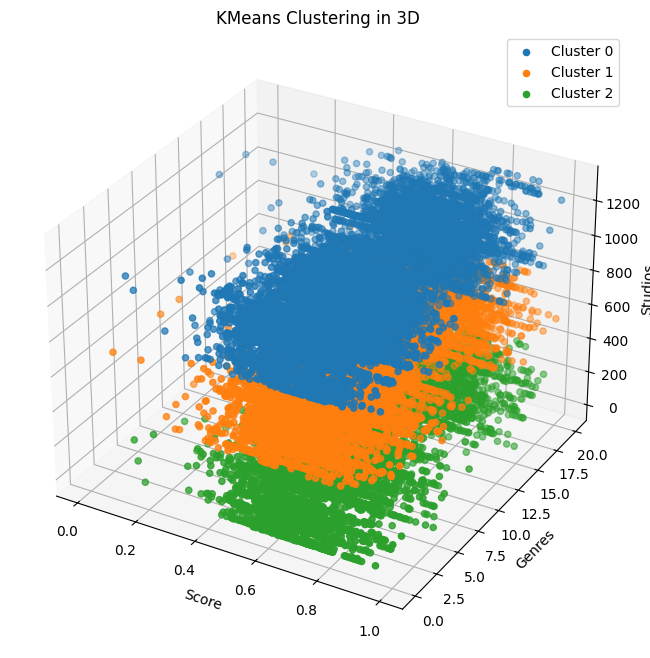

In [11]:
import seaborn as sns
data = np.column_stack((df['Score'], df['Genres'], df['Studios']))

# Compute K-Means
km_res = KMeans(n_clusters=3).fit(data)
clusters = km_res.cluster_centers_

# Put the assigned labels to the original dataset
df['KMeans'] = km_res.labels_

# Plot out the result in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
for cluster in np.unique(df['KMeans']):
    ax.scatter(df[df['KMeans'] == cluster]['Score'], 
               df[df['KMeans'] == cluster]['Genres'], 
               df[df['KMeans'] == cluster]['Studios'], 
               label=f'Cluster {cluster}')

ax.set_xlabel('Score')
ax.set_ylabel('Genres')
ax.set_zlabel('Studios')
ax.set_title('KMeans Clustering in 3D')
ax.legend()

plt.show()

In [12]:
df = df.drop(columns='KMeans')

In [13]:
model = KMeans(n_clusters=3)
model.fit(df)


KMeans(n_clusters=3)

In [14]:
from sklearn.metrics import silhouette_score
silhouette_score(df, model.labels_)

0.6087547818450065

In [15]:
from sklearn.metrics import davies_bouldin_score

dbs = davies_bouldin_score(df, model.labels_)
print(dbs)

0.4818021470836537


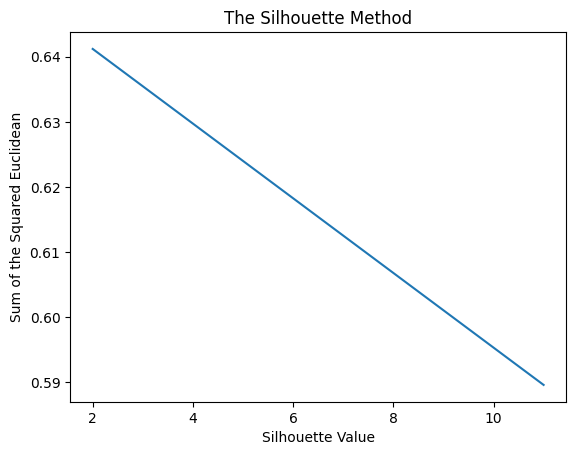

KMeans(n_clusters=3)

In [16]:
from sklearn.metrics import silhouette_score

sil = []
krange = (2, 11)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in krange:
  kmeans = KMeans(n_clusters = k).fit(df)
  labels = kmeans.labels_
  sil.append(silhouette_score(df, labels, metric = 'euclidean'))

plt.title('The Silhouette Method')
plt.plot(krange,sil)
plt.xlabel('Silhouette Value')
plt.ylabel('Sum of the Squared Euclidean')
plt.show()

model = KMeans(n_clusters=3)
model.fit(df)

In [17]:
df_with_id.head()


,anime_id,Name,Score,Genres,Studios
0,1,Cowboy Bebop,0.951724,0,1063
0,1,Cowboy Bebop,0.951724,3,1063
0,1,Cowboy Bebop,0.951724,16,1063
1,5,Cowboy Bebop: Tengoku no Tobira,0.900690,0,158
1,5,Cowboy Bebop: Tengoku no Tobira,0.900690,16,158


# Find where new point is locate in which cluster and find distance between points from chosen point

## Convert input to encode data

In [18]:
anime_name = str(input("What's the anime name >"))
if anime_name in df_with_id['Name'].values:
    row = df_with_id[df_with_id['Name'] == anime_name].copy().drop_duplicates(subset='anime_id')


row

,anime_id,Name,Score,Genres,Studios
10,20,Naruto,0.846897,0,732


In [19]:
encoded = row[['Score','Genres','Studios']].values
print(encoded)

[[  0.84689655   0.         732.        ]]


In [20]:
from scipy.spatial.distance import cdist

nearest_cluster  = model.predict(encoded)

cluster_recommended_data = df[model.labels_ == nearest_cluster]

top5 = []

for index, row in cluster_recommended_data.iterrows():
    cluster_point = np.array([[row['Score'], row['Genres'], row['Studios']]])
    distance = cdist(encoded, cluster_point)
    
    # Add the index and distance to top5 list
    top5.append((index, distance[0][0]))

# Sort the top5 list based on distance
top5.sort(key=lambda x: x[1])

# Keep only the top 5 unique distances and remove duplicates
unique_distances = set()
filtered_top5 = []
for idx, dist in top5:
    if dist not in unique_distances:
        filtered_top5.append((idx, dist))
        unique_distances.add(dist)
    if len(filtered_top5) >= 5:
        break

print(filtered_top5)
    

c:\Users\ChissanuPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


[(10, 0.0), (131, 0.004137931034482678), (9225, 0.0055172413793103114), (6655, 0.008275862068965578), (245, 0.00965517241379299)]


In [22]:
top5_ids = []
for item in filtered_top5:
    top5_ids.append(item[0])

final_df = df_with_id.loc[top5_ids].copy()
final_df = final_df.drop_duplicates(subset='anime_id')

final_df

,anime_id,Name,Score,Genres,Studios
10,20,Naruto,0.846897,0,732
131,153,Juuni Kokuki,0.851034,0,732
9225,25013,Akatsuki no Yona,0.852414,0,732
6655,12031,Kingdom,0.838621,0,732
245,269,Bleach,0.837241,0,732
